# Web Scraping

### What is Web Scraping ?

- Extracting `data` from the `internet`.

- It is based on the `client/server` scheme.

### Why do we need web scraping?

- We need `Data` 

### Is Scraping legal ?

- Public Websites: `YES`

- Others maybe protected by international regulations

### Server and Client 

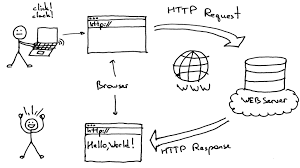

### Some Terms while web scraping


- **requests**
    - Python library for sending HTTP GET and HTTP POST requests
- **Regular Expressions**
    - powerful language to find patterns in text
- **Scrapy**
    - Python library for downloading entire web sites
- **BeautifulSoup4**
    - Python library for parsing HTML pages
- **Unified Resource Locator (URL)**
    - address of a website , file or similar
- **HyperText Markup Language (HTML)**
    - text format in which most web pages are written
- **HyperText Transfer Protocol (HTTP)**
    - method to send text messages from one computer to another, built on top of TCP/IP
- **HTTP GET**
    - request for a web page with a size limit
- **HTTP POST**
    - request for a web page that allows to submit large forms or uploads files
- **API**
    - generic name for a (web) programming interface
- **200**
    - response indicating that a web page was successfully delivered
- **404 Not Found**
    
    - response indicating that a web page could not be found
    
- **400 Bad Request**

### How?

`requests`
<br>
> Retrieves webpages.

> `requests` sends HTTP requests to web pages and allows you to read their content.

> It is a powerful and user-friendly Python library that allows us to send HTTP requests to website/servers and read their content. It sends back a response code, and the full html (if successful).

>`requests` can send data to web forms via HTTP GET and POST, submit files and manage cookies.


### Installing requests

In [ ]:
#!conda install -c conda-forge requests -y
#or
#!pip install requests

In [1]:
import requests

### Scraping the Spiced Academy web page

https://tsmliberia.com/category/fact-check/

#### Define url



In [21]:
URL = "https://tsmliberia.com/the-post-of-costa-for-president-is-misleading/"

#### Send the request and store the response

In [22]:
response = requests.get(url=URL)

#### Explore the response
+ what type of object is it?
+ what's the status code?
+ what's the encoding?
+ what's the actual content i.e. the html text?

In [23]:
type(response)

requests.models.Response

In [24]:
response.status_code

200

In [52]:
# response.text

In [26]:
fact_check_html = response.text

**What is this output?**

It's written in HTML (you don't need to know HTML though to scrape data!)

[Nice introduction here](https://developer.mozilla.org/en-US/docs/Learn/Getting_started_with_the_web/HTML_basics)

**How is it structured?**

HTML consists of a series of *elements*
   - The browser displays the content based on the elements
   - HTML elements contain information about what each part of the webpage is (eg. an image, a heading, a link, a table, etc)
  
Each element consists of **tags** (**opening tag** and **closing tag**) and content.

Some tags will have **attributes** which are like labels that are not displayed with the content but can help distinguish between different types of the same tag.
<br>Important for this week: **a-tags**. 

This is how links are formatted in HTML: 

`<a href="url-to-the-webpage">LINK TEXT HERE</a>`

#### Saving the scraping information to a file to work with later

Let's see how we can write in/read in a file in python.

[open](https://docs.python.org/3/tutorial/inputoutput.html?highlight=open%20library#reading-and-writing-files) built-in python package 

modes:
- `"w"`- write / create content to a file
- `"r"` - read content from a file
- `"a"`- append content to a file

**Write mode**: creates a file if it doesn't exist or overwrites it if it does:

In [27]:
filename = "fact_check_html.txt"

In [28]:
with open(file=filename, mode="w") as file:
    file.write(fact_check_html)

**Read mode**: read only, you can read in a file and save it as a variable in your code or print it

In [44]:
with open(file=filename, mode="r") as file:
    read_fake_check_html =file.read()

In [51]:
# read_fake_check_html

**Append mode** adds text to the end of a file without overwriting it.

In [12]:
with open(file=filename, mode="a") as file:
    file.write("Hello World")

#### Parsing HTML using BeautifulSoup

In [32]:
from bs4 import BeautifulSoup

In [50]:
parsed_content = BeautifulSoup(markup=read_fake_check_html, features='html.parser')
# parsed_content

In [47]:
parsed_content.find(name='div', attrs={'class':'td-post-header'})

<div class="td-post-header td-pb-padding-side">
<div class="entry-crumbs"><span><a class="entry-crumb" href="https://tsmliberia.com/" title="">Home</a></span> <i class="td-icon-right td-bread-sep"></i> <span><a class="entry-crumb" href="https://tsmliberia.com/category/fact-check/" title="View all posts in Fact Check">Fact Check</a></span> <i class="td-icon-right td-bread-sep"></i> <span><a class="entry-crumb" href="https://tsmliberia.com/category/fact-check/elections-and-data/" title="View all posts in Elections and Data">Elections and Data</a></span> <i class="td-icon-right td-bread-sep td-bred-no-url-last"></i> <span class="td-bred-no-url-last">The Post of Costa For President is Misleading</span></div>
<ul class="td-category"><li class="entry-category"><a href="https://tsmliberia.com/category/fact-check/">Fact Check</a></li><li class="entry-category"><a href="https://tsmliberia.com/category/fact-check/elections-and-data/">Elections and Data</a></li><li class="entry-category"><a href=

In [48]:
(parsed_content
.find(name='div', attrs={'class':'td-post-header'})
.find(name='h1')
.get_text()
)

'The Post of Costa For President is Misleading'

In [49]:
(parsed_content
.find(name='figure', attrs={'class':'wp-block-image'})
.find(name='img')
)

<img alt="" decoding="async" src="https://lh6.googleusercontent.com/GGbw9dQgEs4G4CeCzQ9jRlS0feTEa45u5sF33YzCMzT9G_K5GyaBy2D_TGjMIcn-V2MLL_2AbZxpIy8aIh5Y1NnxYF5HGV-EqMkXgimnO2-2LH6yFwgsoxA9u_Sqe5gwShXb9Xvpg0BaXRZV6XX9SQ"/>

### Other useful webscraping tools:


- `regex` : Used for searching the text (https://www.w3schools.com/python/python_regex.asp)

- `Selenium` : Automatic web scraping (https://pypi.org/project/selenium/)

- Difference between requests and web scraping: https://scrapeops.io/python-web-scraping-playbook/python-selenium-vs-python-requests/